# SUBMISSION PERTAMA: ANALISIS SENTIMEN APLIKASI TOKOPEDIA DARI GOOGLE PLAY STORE

Nama    : Thomas Dito Rigorastio

Email   : B244019E@devacademy.id

ID      : B244019E

# Import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import csv
import requests
from io import StringIO

import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import nltk
nltk.download('punkt')  
nltk.download('stopwords') 
nltk.download('punkt_tab')

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


# Load Dataset

In [35]:
df = pd.read_csv("data/ulasan_tokopedia.csv")
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,4048f51a-ced0-415d-aaed-e101f11a2b6a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Saya edit bintangnya!! Tolong yah diperbaiki d...,1,25,3.297.0,2025-02-05 04:21:19,"Hi Toppers, silakan sampaikan kritik/saran ata...",2025-02-05 04:47:02,3.297.0
1,e3a40458-3de7-4ee4-a6e6-947199a50124,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Sejak update, sekarang tidak lagi terlihat kap...",4,11,3.298.0,2025-02-07 20:38:30,Terima kasih sudah mempercayakan Tokopedia seb...,2025-02-07 21:07:08,3.298.0
2,7d3ebfab-e66b-426d-9601-28aad6bd237b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Tokopedia media belanja online yang super pali...,1,9,3.297.0,2025-02-06 23:21:19,"Hi Toppers, silakan sampaikan kritik/saran ata...",2025-02-06 23:47:01,3.297.0
3,eb731139-67ad-4356-8cde-dfe99915d0f9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,kembalikan pengiriman YES JNE atau pilihan jas...,1,9,3.297.0,2025-02-06 10:28:33,"Halo Toppers, terima kasih atas rating yang ka...",2025-02-06 11:07:06,3.297.0
4,27ec601b-9af2-4876-83e2-10fc3214ecf2,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Baru pertama transaksi setelah pembayaran via ...,1,1,3.298.0,2025-02-08 19:57:25,"Hi Toppers, silakan sampaikan kritik/saran ata...",2025-02-08 20:27:05,3.298.0


In [36]:
# memilih fitur penting

clean_df = df[['userName','content', 'score', 'at', 'appVersion']]
clean_df.head()

,userName,content,score,at,appVersion
0,Pengguna Google,Saya edit bintangnya!! Tolong yah diperbaiki d...,1,2025-02-05 04:21:19,3.297.0
1,Pengguna Google,"Sejak update, sekarang tidak lagi terlihat kap...",4,2025-02-07 20:38:30,3.298.0
2,Pengguna Google,Tokopedia media belanja online yang super pali...,1,2025-02-06 23:21:19,3.297.0
3,Pengguna Google,kembalikan pengiriman YES JNE atau pilihan jas...,1,2025-02-06 10:28:33,3.297.0
4,Pengguna Google,Baru pertama transaksi setelah pembayaran via ...,1,2025-02-08 19:57:25,3.298.0


In [37]:
# save dataset yang sudah difilter
clean_df.to_csv('./data/ulasan_tokopedia_clean.csv', index=False)

Keterangan Data:
1. `userName`   : Nama pengguna yang memberikan ulasan atau komentar dari aplikasi Tokopedia ini
2. `content`    : Isi ulasan yang diberikan pengguna
3. `score`      : Rating yang diberikan oleh pengguna untuk nilai dari keseluruhan aplikasi, mungkin mencakup keseluruhan dari user experience
4. `at`         : Tanggal dan waktu pada saat pengguna memberikan ulasan
5. `appVersion` : Versi aplikasi yang diunduh dan digunakan oleh pengguna saat memberikan ulasan

# Preprocessing Data

In [38]:
df = pd.read_csv('data/ulasan_tokopedia_clean.csv')
df.head()

,userName,content,score,at,appVersion
0,Pengguna Google,Saya edit bintangnya!! Tolong yah diperbaiki d...,1,2025-02-05 04:21:19,3.297.0
1,Pengguna Google,"Sejak update, sekarang tidak lagi terlihat kap...",4,2025-02-07 20:38:30,3.298.0
2,Pengguna Google,Tokopedia media belanja online yang super pali...,1,2025-02-06 23:21:19,3.297.0
3,Pengguna Google,kembalikan pengiriman YES JNE atau pilihan jas...,1,2025-02-06 10:28:33,3.297.0
4,Pengguna Google,Baru pertama transaksi setelah pembayaran via ...,1,2025-02-08 19:57:25,3.298.0


In [39]:
# Menghitung jumlah baris dan kolom dalam DataFrame
jumlah_ulasan, jumlah_kolom = df.shape
print(f'Jumlah Ulasan: {jumlah_ulasan}')
print(f'Jumlah Kolom: {jumlah_kolom}')

Jumlah Ulasan: 184500
Jumlah Kolom: 5


In [40]:
# Menampilkan informasi tentang DataFrame df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184500 entries, 0 to 184499
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   userName    184500 non-null  object
 1   content     184500 non-null  object
 2   score       184500 non-null  int64 
 3   at          184500 non-null  object
 4   appVersion  128911 non-null  object
dtypes: int64(1), object(4)
memory usage: 7.0+ MB


insight:
- terlihat ada sejumlah missing value pada kolom 'appversion'

In [41]:

# Menampilkan data yang hilang
df.isnull().sum()

userName          0
content           0
score             0
at                0
appVersion    55589
dtype: int64

In [42]:
# menghapus baris yang memiliki missing value dari df
df_clean = df.dropna()
df_clean.isnull().sum()

userName      0
content       0
score         0
at            0
appVersion    0
dtype: int64

insight:
- terlihat sudah tidak ada missing value pada dataframe

In [43]:
# Menampilkan data duplikat dan parameter statistik
print("Jumlah duplikasi = ", df_clean.duplicated().sum())
df_clean.describe()

Jumlah duplikasi =  0


,score
count,128911.000000
mean,3.567360
std,1.755978
min,1.000000
25%,1.000000
50%,5.000000
75%,5.000000
max,5.000000


In [44]:
# Menghitung jumlah baris dan kolom dalam DataFrame df_clean setelah menghapus duplikat
jumlah_ulasan_clean, jumlah_kolom_clean = df_clean.shape
print(f'Jumlah Ulasan setelah menghapus duplikat: {jumlah_ulasan_clean}')
print(f'Jumlah Kolom setelah menghapus duplikat: {jumlah_kolom_clean}')

Jumlah Ulasan setelah menghapus duplikat: 128911
Jumlah Kolom setelah menghapus duplikat: 5


# Preprocessing text

In [45]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka

    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghapus semua tanda baca
    text = text.strip(' ') # menghapus karakter spasi dari kiri dan kanan teks
    return text

def casefoldingText(text): # Mengubah semua karakter dalam teks menjadi huruf kecil
    text = text.lower()
    return text

def tokenizingText(text): # Memecah atau membagi string, teks menjadi daftar token
    text = word_tokenize(text)
    return text

def filteringText(text): # Menghapus stopwords dalam teks
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy", "yg", "gak", "ngisi", "udah", "d", "sih", "nya", "srg", "utk", "byk", "gk", "ga", "aja", "tp", "udh"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Mengurangi kata ke bentuk dasarnya yang menghilangkan imbuhan awalan dan akhiran atau ke akar kata
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

In [46]:
def load_slangwords_from_csv(file_path):
    
    df = pd.read_csv(file_path)

    
    slang_dict = pd.Series(df['replacement'].values, index=df['slang']).to_dict()
    return slang_dict

In [47]:
slangwords = load_slangwords_from_csv('data/slang_indo.csv')
    
def fix_slangwords(text):
    words = text.split()
    fixed_words = []
    
    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)
    
    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [ ]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
df_clean['text_clean'] = df_clean['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
df_clean['text_casefoldingText'] = df_clean['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
df_clean['text_slangwords'] = df_clean['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token dan menyimpannya di 'text_tokenizingText'
df_clean['text_tokenizingText'] = df_clean['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop dan menyimpannya di 'text_stopword'
df_clean['text_stopword'] = df_clean['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
df_clean['text_akhir'] = df_clean['text_stopword'].apply(toSentence)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1069284\2146360300.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['text_clean'] = df_clean['content'].apply(cleaningText)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1069284\2146360300.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['text_casefoldingText'] = df_clean['text_clean'].apply(casefoldingText)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1069284\2146360300.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [49]:
# menampilkan df_clean setelah melalui preprocessing text
df_clean

,userName,content,score,at,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,Pengguna Google,Saya edit bintangnya!! Tolong yah diperbaiki d...,1,2025-02-05 04:21:19,3.297.0,Saya edit bintangnya Tolong yah diperbaiki dul...,saya edit bintangnya tolong yah diperbaiki dul...,saya edit bintangnya tolong yah diperbaiki dul...,"[saya, edit, bintangnya, tolong, yah, diperbai...","[edit, bintangnya, tolong, yah, diperbaiki, fo...",edit bintangnya tolong yah diperbaiki foto buj...
1,Pengguna Google,"Sejak update, sekarang tidak lagi terlihat kap...",4,2025-02-07 20:38:30,3.298.0,Sejak update sekarang tidak lagi terlihat kapa...,sejak update sekarang tidak lagi terlihat kapa...,sejak update sekarang tidak lagi terlihat kapa...,"[sejak, update, sekarang, tidak, lagi, terliha...","[update, penjual, online, kali, pickup, seller...",update penjual online kali pickup seller super...
2,Pengguna Google,Tokopedia media belanja online yang super pali...,1,2025-02-06 23:21:19,3.297.0,Tokopedia media belanja online yang super pali...,tokopedia media belanja online yang super pali...,tokopedia media belanja online yang super pali...,"[tokopedia, media, belanja, online, yang, supe...","[tokopedia, media, belanja, online, super, pen...",tokopedia media belanja online super pengirima...
3,Pengguna Google,kembalikan pengiriman YES JNE atau pilihan jas...,1,2025-02-06 10:28:33,3.297.0,kembalikan pengiriman YES JNE atau pilihan jas...,kembalikan pengiriman yes jne atau pilihan jas...,kembalikan pengiriman yes jne atau pilihan jas...,"[kembalikan, pengiriman, yes, jne, atau, pilih...","[kembalikan, pengiriman, yes, jne, pilihan, ja...",kembalikan pengiriman yes jne pilihan jasa ber...
4,Pengguna Google,Baru pertama transaksi setelah pembayaran via ...,1,2025-02-08 19:57:25,3.298.0,Baru pertama transaksi setelah pembayaran via ...,baru pertama transaksi setelah pembayaran via ...,baru pertama transaksi setelah pembayaran via ...,"[baru, pertama, transaksi, setelah, pembayaran...","[transaksi, pembayaran, via, transfer, bank, b...",transaksi pembayaran via transfer bank berhasi...
...,...,...,...,...,...,...,...,...,...,...,...
184494,Pengguna Google,transaksi yg mudah cepat dan aman,4,2020-12-10 19:08:49,3.103,transaksi yg mudah cepat dan aman,transaksi yg mudah cepat dan aman,transaksi yang mudah cepat dan aman,"[transaksi, yang, mudah, cepat, dan, aman]","[transaksi, mudah, cepat, aman]",transaksi mudah cepat aman
184495,Pengguna Google,Bagus dan lancar pesan apapun,5,2022-09-16 17:19:38,3.186,Bagus dan lancar pesan apapun,bagus dan lancar pesan apapun,bagus dan lancar pesan apapun,"[bagus, dan, lancar, pesan, apapun]","[bagus, lancar, pesan, apapun]",bagus lancar pesan apapun
184496,Pengguna Google,sangat mudah skrng ada paylater hehe,5,2024-01-31 04:49:03,3.250,sangat mudah skrng ada paylater hehe,sangat mudah skrng ada paylater hehe,sangat mudah sekarang ada paylater hehe,"[sangat, mudah, sekarang, ada, paylater, hehe]","[mudah, paylater, hehe]",mudah paylater hehe
184498,Pengguna Google,Bagus dan tingkatkan pelayanan,5,2018-11-05 15:10:56,3.5,Bagus dan tingkatkan pelayanan,bagus dan tingkatkan pelayanan,bagus dan tingkatkan pelayanan,"[bagus, dan, tingkatkan, pelayanan]","[bagus, tingkatkan, pelayanan]",bagus tingkatkan pelayanan


# Labeling

In [ ]:
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:

    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV

    for row in reader:
        
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:

    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV

    for row in reader:
        
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")

In [ ]:
# Fungsi untuk menentukan polaritas sentimen dari tweet
def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:
    
    score = 0
    # Inisialisasi skor sentimen ke 0
    
    for word in text:
        # Mengulangi setiap kata dalam teks
    
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # menambahkan skornya ke skor sentimen jika kata ada dalam kamus positif
    
    for word in text:
        # Untuk kamus negatif
    
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
            # mengurangi skornya dari skor sentimen jika kata ada di dalam kamus negaitf
    
    polarity=''
    # Inisialisasi variabel polaritas
    
    if (score > 0):
        polarity = 'positive'
        # Jika skor sentimen lebih besar atau sama dengan 0, maka polaritas adalah positif
    elif (score < 0):
        polarity = 'negative'
        # Jika skor sentimen kurang dari 0, maka polaritas adalah negatif
    
    else:
        polarity = 'neutral'
    # Ini adalah bagian yang bisa digunakan untuk menentukan polaritas netral jika diperlukan
    
    return score, polarity
    # Mengembalikan skor sentimen dan polaritas teks

In [52]:
results = df_clean['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
df_clean['polarity_score'] = results[0]
df_clean['polarity'] = results[1]
print(df_clean['polarity'].value_counts())

polarity
positive    69745
negative    48383
neutral     10783
Name: count, dtype: int64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1069284\4014989788.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['polarity_score'] = results[0]
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1069284\4014989788.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['polarity'] = results[1]


insight:
- terdapat 3 label yang digunakan
- positif, negatif, dan netral

In [53]:
df_clean.head()

,userName,content,score,at,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,polarity_score,polarity
0,Pengguna Google,Saya edit bintangnya!! Tolong yah diperbaiki d...,1,2025-02-05 04:21:19,3.297.0,Saya edit bintangnya Tolong yah diperbaiki dul...,saya edit bintangnya tolong yah diperbaiki dul...,saya edit bintangnya tolong yah diperbaiki dul...,"[saya, edit, bintangnya, tolong, yah, diperbai...","[edit, bintangnya, tolong, yah, diperbaiki, fo...",edit bintangnya tolong yah diperbaiki foto buj...,-12,negative
1,Pengguna Google,"Sejak update, sekarang tidak lagi terlihat kap...",4,2025-02-07 20:38:30,3.298.0,Sejak update sekarang tidak lagi terlihat kapa...,sejak update sekarang tidak lagi terlihat kapa...,sejak update sekarang tidak lagi terlihat kapa...,"[sejak, update, sekarang, tidak, lagi, terliha...","[update, penjual, online, kali, pickup, seller...",update penjual online kali pickup seller super...,3,positive
2,Pengguna Google,Tokopedia media belanja online yang super pali...,1,2025-02-06 23:21:19,3.297.0,Tokopedia media belanja online yang super pali...,tokopedia media belanja online yang super pali...,tokopedia media belanja online yang super pali...,"[tokopedia, media, belanja, online, yang, supe...","[tokopedia, media, belanja, online, super, pen...",tokopedia media belanja online super pengirima...,-2,negative
3,Pengguna Google,kembalikan pengiriman YES JNE atau pilihan jas...,1,2025-02-06 10:28:33,3.297.0,kembalikan pengiriman YES JNE atau pilihan jas...,kembalikan pengiriman yes jne atau pilihan jas...,kembalikan pengiriman yes jne atau pilihan jas...,"[kembalikan, pengiriman, yes, jne, atau, pilih...","[kembalikan, pengiriman, yes, jne, pilihan, ja...",kembalikan pengiriman yes jne pilihan jasa ber...,3,positive
4,Pengguna Google,Baru pertama transaksi setelah pembayaran via ...,1,2025-02-08 19:57:25,3.298.0,Baru pertama transaksi setelah pembayaran via ...,baru pertama transaksi setelah pembayaran via ...,baru pertama transaksi setelah pembayaran via ...,"[baru, pertama, transaksi, setelah, pembayaran...","[transaksi, pembayaran, via, transfer, bank, b...",transaksi pembayaran via transfer bank berhasi...,-3,negative


In [54]:
# fungsi untuk menampilkan wordcloud
def word_cloud(data, title):
    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', random_state=10).generate(data)

    # Display the WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

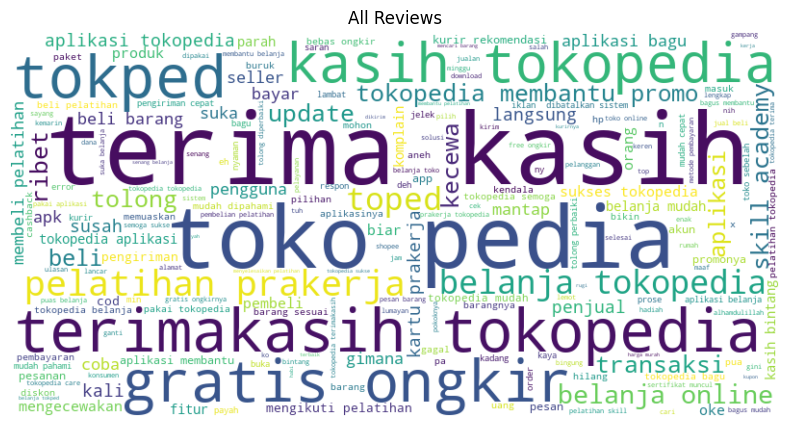

In [55]:
# Menampilkan WordCloud dari semua ulasan
word_cloud(' '.join(df_clean['text_akhir']), 'All Reviews')

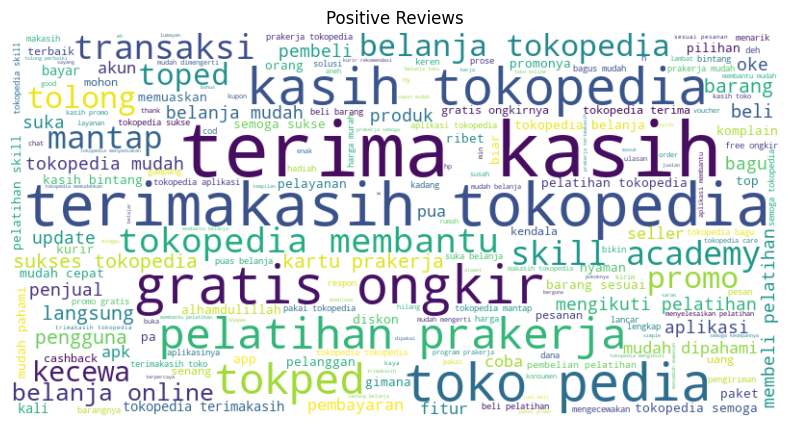

In [56]:
# ulasan positif
word_cloud(' '.join(df_clean[df_clean['polarity'] == 'positive']['text_akhir']), 'Positive Reviews')

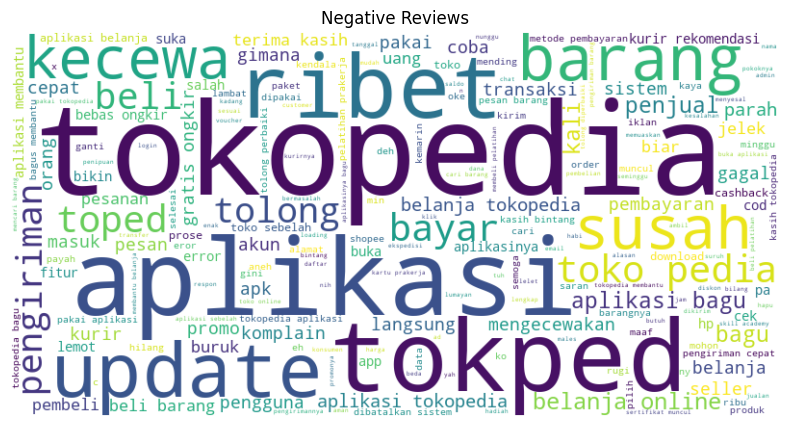

In [57]:
# ulasan negatif
word_cloud(' '.join(df_clean[df_clean['polarity'] == 'negative']['text_akhir']), 'Negative Reviews')

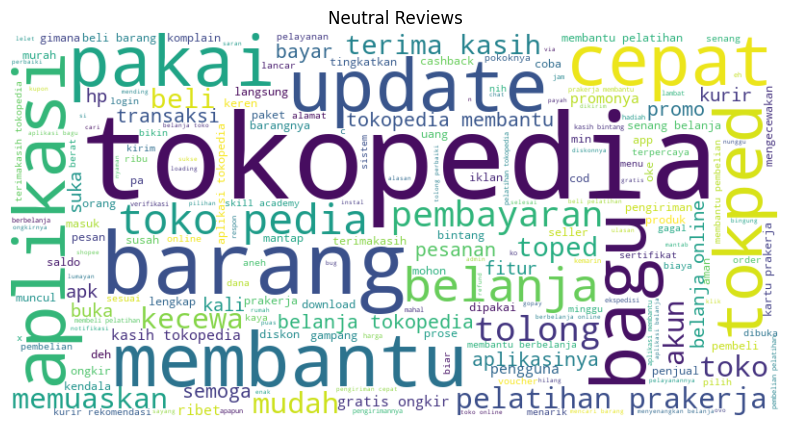

In [58]:
# ulasan netral
word_cloud(' '.join(df_clean[df_clean['polarity'] == 'neutral']['text_akhir']), 'Neutral Reviews')

# Encoding & Splitting Data

In [59]:
df_clean.head()

,userName,content,score,at,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,polarity_score,polarity
0,Pengguna Google,Saya edit bintangnya!! Tolong yah diperbaiki d...,1,2025-02-05 04:21:19,3.297.0,Saya edit bintangnya Tolong yah diperbaiki dul...,saya edit bintangnya tolong yah diperbaiki dul...,saya edit bintangnya tolong yah diperbaiki dul...,"[saya, edit, bintangnya, tolong, yah, diperbai...","[edit, bintangnya, tolong, yah, diperbaiki, fo...",edit bintangnya tolong yah diperbaiki foto buj...,-12,negative
1,Pengguna Google,"Sejak update, sekarang tidak lagi terlihat kap...",4,2025-02-07 20:38:30,3.298.0,Sejak update sekarang tidak lagi terlihat kapa...,sejak update sekarang tidak lagi terlihat kapa...,sejak update sekarang tidak lagi terlihat kapa...,"[sejak, update, sekarang, tidak, lagi, terliha...","[update, penjual, online, kali, pickup, seller...",update penjual online kali pickup seller super...,3,positive
2,Pengguna Google,Tokopedia media belanja online yang super pali...,1,2025-02-06 23:21:19,3.297.0,Tokopedia media belanja online yang super pali...,tokopedia media belanja online yang super pali...,tokopedia media belanja online yang super pali...,"[tokopedia, media, belanja, online, yang, supe...","[tokopedia, media, belanja, online, super, pen...",tokopedia media belanja online super pengirima...,-2,negative
3,Pengguna Google,kembalikan pengiriman YES JNE atau pilihan jas...,1,2025-02-06 10:28:33,3.297.0,kembalikan pengiriman YES JNE atau pilihan jas...,kembalikan pengiriman yes jne atau pilihan jas...,kembalikan pengiriman yes jne atau pilihan jas...,"[kembalikan, pengiriman, yes, jne, atau, pilih...","[kembalikan, pengiriman, yes, jne, pilihan, ja...",kembalikan pengiriman yes jne pilihan jasa ber...,3,positive
4,Pengguna Google,Baru pertama transaksi setelah pembayaran via ...,1,2025-02-08 19:57:25,3.298.0,Baru pertama transaksi setelah pembayaran via ...,baru pertama transaksi setelah pembayaran via ...,baru pertama transaksi setelah pembayaran via ...,"[baru, pertama, transaksi, setelah, pembayaran...","[transaksi, pembayaran, via, transfer, bank, b...",transaksi pembayaran via transfer bank berhasi...,-3,negative


In [60]:
# assign text dan label

texts = df_clean['text_akhir'].values
labels = df_clean['polarity'].values

In [ ]:
# label encoding
encoder = LabelEncoder()
labels = encoder.fit_transform(labels)
labels = to_categorical(labels)

In [ ]:
# Splitting data menggunakan 80:20

X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

Pada spliting data ini, dataset saya bagi ke dalam 80:20 untuk data latih dan data uji

In [63]:
# tokenisasi
max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

In [64]:
# Jumlah label unik
num_classes = labels.shape[1]
num_classes

3

# Pengembangan Model

In [65]:
# membuat model LSTM
model = Sequential()
model.add(Embedding(max_words, 128, input_length=max_len))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# melatih model
history = model.fit(X_train_pad, y_train, epochs=3, batch_size=32, validation_split=0.2)

Epoch 1/3


c:\Users\LENOVO\.virtualenvs\submission-pengembanganML-pertama-jhskT387\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


2579/2579 ━━━━━━━━━━━━━━━━━━━━ 126s 48ms/step - accuracy: 0.8109 - loss: 0.4589 - val_accuracy: 0.9242 - val_loss: 0.2063
Epoch 2/3
2579/2579 ━━━━━━━━━━━━━━━━━━━━ 117s 46ms/step - accuracy: 0.9435 - loss: 0.1532 - val_accuracy: 0.9448 - val_loss: 0.1653
Epoch 3/3
2579/2579 ━━━━━━━━━━━━━━━━━━━━ 116s 45ms/step - accuracy: 0.9631 - loss: 0.1012 - val_accuracy: 0.9488 - val_loss: 0.1641


insight:
- terlihat hasil pada saat pelatihan model dengan data train
- akurasi tertinggi ada pada epoch 3, sebesar 96%
- model cukup baik dalam mempelajari data

In [66]:
# Evaluasi model pada data test

loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

806/806 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9497 - loss: 0.1594
Test Accuracy: 95.09%


insight:
- hasil tes model pada data uji, menghasilkan akurasi senilai 95%
- hasil latih model pada data latih, menghasilkan akurasi tertinggi pada epoch 3, sebesar 96%
- menandakan model tidak hanya baik pada data latih, tetapi juga baik pada data uji

# Inference atau Testing

In [ ]:
# Kalimat baru untuk prediksi
new_sentences = ['beberapa fitur sangat berguna', 'aplikasinya jelek banget', 'aplikasi lemot di hp saya','sangat bermanfaat aplikasinya','app sudah cukup baik']

# Tokenisasi dan padding
new_sequences = tokenizer.texts_to_sequences(new_sentences)
new_padded = pad_sequences(new_sequences, maxlen=max_len)

# Melakukan prediksi
predictions = model.predict(new_padded)

# Konversi prediksi menjadi label
predicted_labels = np.argmax(predictions, axis=1)
predicted_labels = encoder.inverse_transform(predicted_labels)

# Tampilkan hasil prediksi
for sentence, label in zip(new_sentences, predicted_labels):
    print(f'Sentence: "{sentence}" - Predicted Label: {label}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
Sentence: "beberapa fitur sangat berguna" - Predicted Label: positive
Sentence: "aplikasinya jelek banget" - Predicted Label: negative
Sentence: "aplikasi lemot di hp saya" - Predicted Label: negative
Sentence: "sangat bermanfaat aplikasinya" - Predicted Label: positive
Sentence: "app sudah cukup baik" - Predicted Label: neutral


insight:
- terlihat dari hasil inference testing, model bekerja dengan cukup baik, saat diuji dengan kalimat baru yang acak.
- hasil dari prediksi label terhadap kalimat yang diberikan juga dirasa cukup logis